# only node can put the change in state variables not the tools

In [19]:
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict


class Overall_State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    output: str


In [20]:
from langchain_core.tools import tool

@tool("add", return_direct=True)
def add(a: int , b: int) -> str:
   
    """
    Tool to add two numbers together.

    Args:
        a (int): first number
        b (int): second number

    Returns:
        str: the result of the addition as a string
    """

    summation = a + b

    return summation

In [21]:
from utils.getLLM import get_llm_embedings
llm = get_llm_embedings("open_ai")["llm"]
llm_with_tools = llm.bind_tools([add])

In [22]:

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage


def chatbot(state: Overall_State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder = StateGraph(Overall_State)

graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools",ToolNode([add]))

graph_builder.add_edge(START, "assistant")

graph_builder.add_conditional_edges(
    "assistant",
    tools_condition,
)

graph_builder.add_edge("tools", "assistant")

graph = graph_builder.compile()


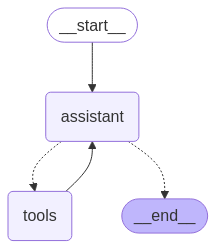

In [23]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:

    pass

In [24]:

output = graph.invoke({"messages": [HumanMessage(content="2+2")]})   

In [25]:
output

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='e4731c50-e7c5-4725-92c4-ad425e5f50d1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_uFSyeABk6rFlRugePdUNBYG1', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 81, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-902ed9b6-4ac3-4f90-a2a2-1068e11c9695-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'call_uFSyeABk6rFlRugePdUNBYG1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 81, 'output_tokens': 18, 'total_tokens':

# lets change the state from node

In [26]:

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage

#node
def putOutput(state: Overall_State):
    output= state["messages"][-1].content
    return {"output":output}

def chatbot(state: Overall_State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder = StateGraph(Overall_State)

graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools",ToolNode([add]))
graph_builder.add_node("addoutput",putOutput)

graph_builder.add_edge(START, "assistant")

graph_builder.add_conditional_edges(
    "assistant",
    tools_condition,
)

graph_builder.add_edge("tools", "addoutput")
graph_builder.add_edge("addoutput", "assistant")


graph = graph_builder.compile()


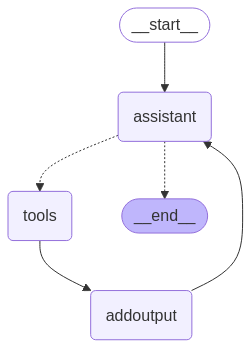

In [27]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:

    pass

In [28]:

output = graph.invoke({"messages": [HumanMessage(content="5+2")]})   

output

{'messages': [HumanMessage(content='5+2', additional_kwargs={}, response_metadata={}, id='834c725b-7c47-4e30-9111-8eacb86a51be'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_DK9cKe31csZEBF1qx722ZFM0', 'function': {'arguments': '{"a":5,"b":2}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 81, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-259a4544-7097-404a-99ad-c85e3ff9a99a-0', tool_calls=[{'name': 'add', 'args': {'a': 5, 'b': 2}, 'id': 'call_DK9cKe31csZEBF1qx722ZFM0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 81, 'output_tokens': 18, 'total_tokens':